# `Clustering and PCA Assignment`

### Problem Statement:
*Perform PCA on the dataset in order to obtain the Principal Components, perform Clustering on the countries using a suitable number of components to segment and categorize countries based on socio-economic and health factors that determine the overall development of the country and then show the clusters on those components as well as as well as the few selected variables.*

## Step 1: Importing import packages and Reading Data

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# To perform PCA
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd


# To perform KMeans clustering
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#reading Dataset
country = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Step 2: Inspecting the Dataframe

In [4]:
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
country.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
country.shape

(167, 10)

## Step 3: Null value investigation

In [7]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(country.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(country.isnull().sum()/country.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
gdpp,0,0.0
total_fer,0,0.0
life_expec,0,0.0
inflation,0,0.0
income,0,0.0
imports,0,0.0
health,0,0.0
exports,0,0.0
child_mort,0,0.0
country,0,0.0


## Step 4: Checking for Outliers

In [8]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,100.220,116.000,153.4000,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,70.800,80.570,160.4800,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,10.940,11.570,13.4740,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,75.420,81.140,146.0800,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,41220.000,48290.000,84374.0000,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,16.640,20.870,41.4780,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,80.400,81.400,82.3700,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,5.322,5.861,6.5636,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,41840.000,48610.000,79088.0000,105000.00


From the distribution shown above, you can see that there no outliner in your data.

In [9]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
numeric_variables = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
print(numeric_variables)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


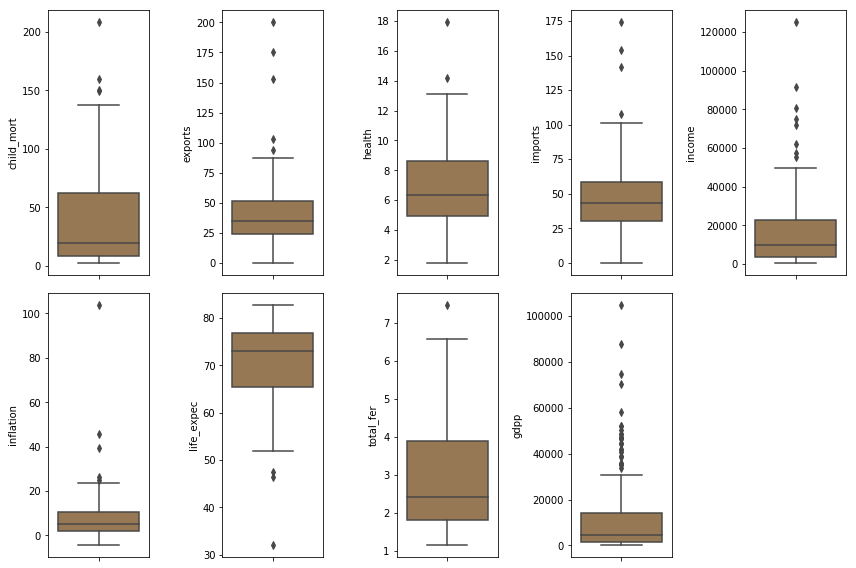

In [11]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=country)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

## Logic for Outlier Treatment

*Clearly there are quite a few outliers in some of the variables. In some other scenarios, we would have gone ahead and dropped these outlier observations from the dataset since the clustering process is very sensitive to the presence of outliers in the data.*

*However, in this scenario, it is not adisable to ommit the outlier values. The purpose of the assignment is to group countries based on their socio-economic factors. We are doing this for an NGO who want to allocate their funds to poor countries. If we do ommit outliers, than we can lose some important countries which are very low on socioeconomic factors and may be good candidates for financial aid from the NGO. *

**Instead we stick to the following procedure:**

 -<font color = blue>For the variables where outliers are present, we will CAP the values above and below a certain predecided value.</font> 
 
 -<font color = blue>This pre-decided value will be selected after analyzing the percentile distribution of the variable values.</font>
 

|       |count | mean    |	std    |min   |25%   |50%   |75%   |90%   |95%   |99%     |max   |
|-------|------|---------|---------|------|------|------|------|------|------|--------|------|
|exports|167.0 |41.108976|27.412010|0.1090|23.800|35.00 |51.35 |70.800|<font color = red>80.570</font>|<font color = red>160.4800</font>|<font color = red>200.00</font>|

*For eg, the variable exports has a constant distribution across percentile till 95% after which the value shoots up. Clearly there are outliers here.*


**As per our process, we cap all the values of observations above 95 percentile to the value corresponding to 95 percentile. This is because, anything above the 80 value mark(value correspondin to 95 percentile in this case) is high enough in our present context compared to other percentile values, be it 160 or 200. They demands similar action on them. Together they can be looked upon as 80 and up.**

**Also this way `we do not loose any important records.`** 

In [12]:
# Determining the predecided value for capping for the variables that need outlier treatment

print(country[['inflation','imports','income','exports']].quantile([0.01, .95]))
print(country[['life_expec']].quantile([0.02, .95]))
print(country[['gdpp']].quantile([0.01, .85]))
print(country[['child_mort']].quantile([0.01, .97]))
print(country[['health','total_fer']].quantile([0.01, .99]))

      inflation  imports    income  exports
0.01    -2.3488   12.988    742.24   3.9094
0.95    20.8700   81.140  48290.00  80.5700
      life_expec
0.02      52.352
0.95      81.400
          gdpp
0.01    331.62
0.85  31090.00
      child_mort
0.01        2.80
0.97      130.14
       health  total_fer
0.01   2.1218     1.2432
0.99  13.4740     6.5636


In [13]:
# Capping the outlier values with values corresponding to predecided percentiles

country['inflation'][np.abs(country['inflation'] > 20.8700)]= 20.8700
country['imports'][np.abs(country['imports'] > 81.140)]= 81.140
country['income'][np.abs(country['income'] > 48290.00)]= 48290.00
country['exports'][np.abs(country['exports'] > 80.5700)]= 80.5700
country['life_expec'][np.abs(country['life_expec'] < 52.352)]= 52.352
country['gdpp'][np.abs(country['gdpp'] > 31090.00)]= 31090.00
country['child_mort'][np.abs(country['child_mort'] > 130.14)]= 130.14
country['health'][np.abs(country['health'] > 13.4740)]= 13.4740
country['total_fer'][np.abs(country['total_fer'] > 6.5636)]= 6.5636

In [14]:
country.shape

(167, 10)

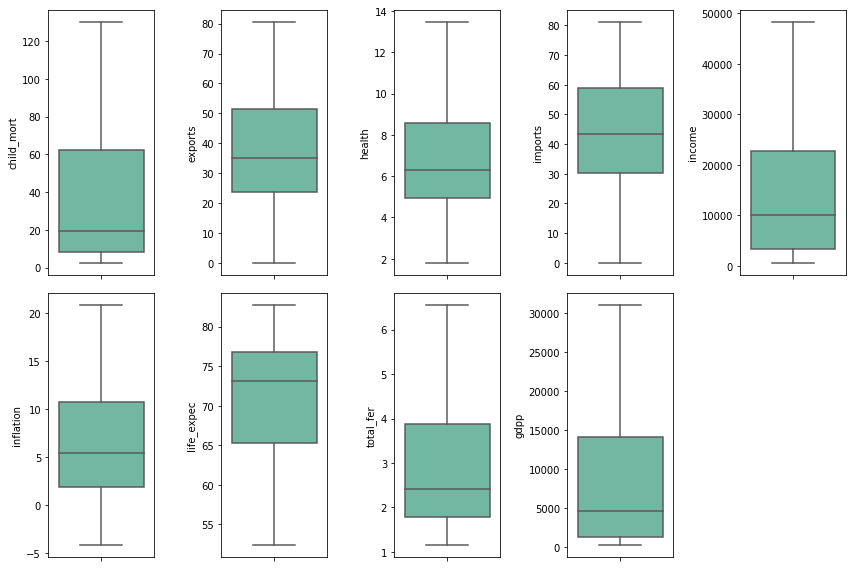

In [15]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=country)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

In [16]:
standard_country = country.copy()
standard_country.shape

(167, 10)

## Step 5: Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_country[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']] = scaler.fit_transform(standard_country[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']])
standard_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.412036,-1.440180,0.301239,-0.013380,-0.958349,0.394438,-1.751405,1.926396,-0.864244
1,Albania,-0.554472,-0.548655,-0.088966,0.185228,-0.394006,-0.383226,0.669199,-0.865054,-0.542231
2,Algeria,-0.268581,-0.033552,-0.990604,-0.738030,-0.192552,1.440750,0.693285,-0.034983,-0.508546
3,Angola,2.181539,1.150195,-1.490672,-0.120735,-0.667360,2.190136,-1.281735,2.153997,-0.593215
4,Antigua and Barbuda,-0.722801,0.318105,-0.285963,0.738110,0.227992,-0.862393,0.729413,-0.543736,0.196113


In [18]:
country_numerical = standard_country.drop('country', axis=1)
country_numerical.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.412036,-1.440180,0.301239,-0.013380,-0.958349,0.394438,-1.751405,1.926396,-0.864244
1,-0.554472,-0.548655,-0.088966,0.185228,-0.394006,-0.383226,0.669199,-0.865054,-0.542231
2,-0.268581,-0.033552,-0.990604,-0.738030,-0.192552,1.440750,0.693285,-0.034983,-0.508546
3,2.181539,1.150195,-1.490672,-0.120735,-0.667360,2.190136,-1.281735,2.153997,-0.593215
4,-0.722801,0.318105,-0.285963,0.738110,0.227992,-0.862393,0.729413,-0.543736,0.196113


In [19]:
pd.DataFrame(country_numerical).describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,6.648042e-18,1.003008,-0.928536,-0.777575,-0.482331,0.661236,2.479187
exports,167.0,1.023798e-16,1.003008,-1.930073,-0.756678,-0.201951,0.607851,2.055093
health,167.0,4.078574e-16,1.003008,-1.884665,-0.706474,-0.176099,0.687655,2.534118
imports,167.0,6.302344e-16,1.003008,-2.419976,-0.802443,-0.099264,0.730058,1.931904
income,167.0,7.711729e-17,1.003008,-1.026246,-0.839986,-0.391971,0.478961,2.207939
inflation,167.0,1.568938e-16,1.003008,-1.750030,-0.804265,-0.241833,0.600244,2.190136
life_expec,167.0,1.630100e-15,1.003008,-2.214812,-0.655509,0.283829,0.729413,1.451982
total_fer,167.0,1.236536e-16,1.003008,-1.199761,-0.767989,-0.356301,0.627736,2.424172
gdpp,167.0,5.916757e-17,1.003008,-0.893559,-0.793505,-0.490338,0.364539,1.915880


## Step 6: PCA on the data

In [20]:
country_numerical.shape

(167, 9)

In [21]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
#Doing the PCA on the country data
country_pca = pca.fit_transform(country_numerical)
country_pca

array([[-3.24845955,  0.28537872, -1.04245926, ...,  0.37772312,
         0.40731712, -0.07438245],
       [ 0.44704125,  0.12193605, -0.32187479, ...,  0.12232643,
        -0.2528469 , -0.13034577],
       [-0.42792885,  0.64016822,  1.67729747, ..., -0.30133541,
        -0.20616096, -0.09422689],
       ...,
       [ 0.29803856, -2.39231971,  0.51957948, ..., -0.23761245,
        -0.33750425,  0.17501221],
       [-2.23896936,  0.56013473,  1.33140399, ..., -0.1604302 ,
         0.08244356,  0.07813627],
       [-3.19471902,  0.06521037,  0.42564787, ..., -0.12657706,
         0.68154476,  0.12548166]])

In [23]:
# Displaying the no of components created
pca.n_components_

9

In [24]:
# Displaying the components created
pca.components_

array([[-0.42013313,  0.23759233,  0.16684469,  0.093987  ,  0.40940661,
        -0.22510546,  0.42862614, -0.40468044,  0.40570243],
       [-0.05039655, -0.57714783,  0.13129136, -0.7492217 ,  0.12156645,
         0.13405633,  0.1478636 , -0.02634141,  0.17459378],
       [-0.07970518,  0.33855112, -0.68315861, -0.21560838,  0.17314763,
         0.5681594 ,  0.09383107, -0.05092833,  0.04067436],
       [ 0.38577938,  0.24818362,  0.31715367, -0.00624007,  0.4403097 ,
         0.19355011, -0.2147364 ,  0.44655682,  0.46053749],
       [-0.2239656 , -0.00256938,  0.54588625,  0.19776674, -0.13263989,
         0.73011694,  0.07132011, -0.14940821, -0.18616087],
       [ 0.11016369,  0.35012228,  0.1745794 , -0.37494315,  0.00891201,
        -0.07740048, -0.58439565, -0.58172727, -0.09068007],
       [ 0.08537293, -0.55308418, -0.23795583,  0.44896182,  0.2618782 ,
         0.1562077 , -0.37068529, -0.36223809,  0.25887181],
       [-0.77138897, -0.01626899, -0.02831685, -0.04387864,  0

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [25]:
colnames = list(pd.DataFrame(country_numerical).columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.420133,-0.050397,child_mort
1,0.237592,-0.577148,exports
2,0.166845,0.131291,health
3,0.093987,-0.749222,imports
4,0.409407,0.121566,income
5,-0.225105,0.134056,inflation
6,0.428626,0.147864,life_expec
7,-0.404680,-0.026341,total_fer
8,0.405702,0.174594,gdpp


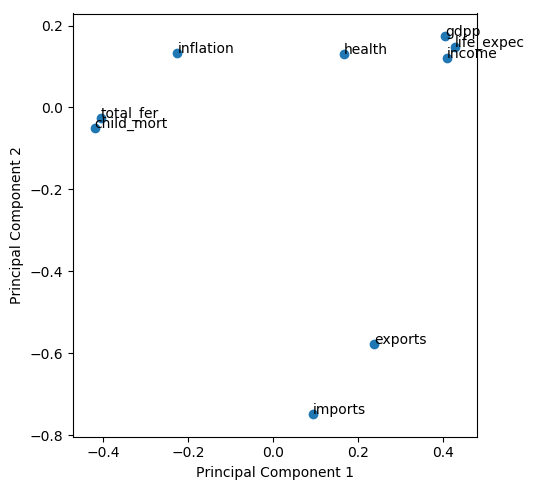

In [26]:
%matplotlib inline
fig = plt.figure(figsize=(5,5), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [27]:
pd.options.display.float_format = '{:.2f}'.format
pca.explained_variance_ratio_

array([0.49344273, 0.16368231, 0.13792874, 0.09277626, 0.06495063,
       0.01941071, 0.0157257 , 0.00890927, 0.00317367])

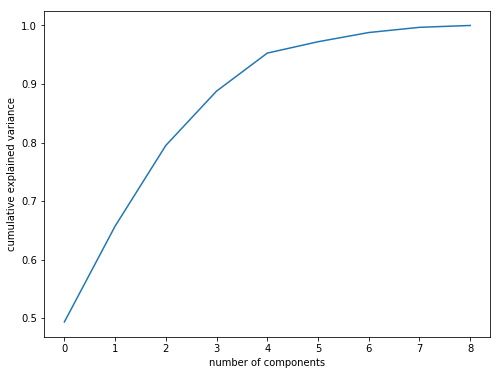

In [28]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 5 components are enough to describe 95% of the variance in the dataset
- We'll choose 5 components for our modeling

### Calculating PCA again for 95% variance in data

In [29]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_again = PCA(.95)

In [30]:
#Doing the PCA on the train data
country_pca = pca_again.fit_transform(country_numerical)

In [31]:
pca_again.n_components_

5

In [32]:
pca_again.components_

array([[-0.42013313,  0.23759233,  0.16684469,  0.093987  ,  0.40940661,
        -0.22510546,  0.42862614, -0.40468044,  0.40570243],
       [-0.05039655, -0.57714783,  0.13129136, -0.7492217 ,  0.12156645,
         0.13405633,  0.1478636 , -0.02634141,  0.17459378],
       [-0.07970518,  0.33855112, -0.68315861, -0.21560838,  0.17314763,
         0.5681594 ,  0.09383107, -0.05092833,  0.04067436],
       [ 0.38577938,  0.24818362,  0.31715367, -0.00624007,  0.4403097 ,
         0.19355011, -0.2147364 ,  0.44655682,  0.46053749],
       [-0.2239656 , -0.00256938,  0.54588625,  0.19776674, -0.13263989,
         0.73011694,  0.07132011, -0.14940821, -0.18616087]])

In [33]:
colnames = list(pd.DataFrame(country_numerical).columns)
pcs_df = pd.DataFrame({'PC1':pca_again.components_[0],'PC2':pca_again.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.42,-0.05,child_mort
1,0.24,-0.58,exports
2,0.17,0.13,health
3,0.09,-0.75,imports
4,0.41,0.12,income
5,-0.23,0.13,inflation
6,0.43,0.15,life_expec
7,-0.40,-0.03,total_fer
8,0.41,0.17,gdpp


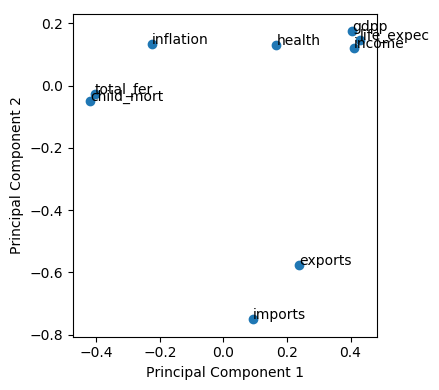

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(4, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [35]:
# Displaying the country dataframe based on the new principal components
country_pca_df = pd.DataFrame(country_pca)
country_pca_df.head()

,0,1,2,3,4
0,-3.25,0.29,-1.04,0.78,0.01
1,0.45,0.12,-0.32,-1.41,0.16
2,-0.43,0.64,1.68,-0.63,0.60
3,-3.33,-1.02,2.13,1.75,0.06
4,1.30,-0.67,-0.14,-0.67,-0.41


In [36]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [37]:
# Dislaying the dataframe shapes before merging
print(country_pca_df.shape)
print(country.shape)

(167, 5)
(167, 10)


In [38]:
# Resetting the index of the dataframe shapes before merging 
country_pca_df.reset_index(drop=True, inplace=True)
country.reset_index(drop=True, inplace=True)

In [39]:
# Concatenating the dataframes
# New dataframe contains both the original variables and newly created PCS

country_with_pca = pd.concat([country, country_pca_df], axis=1)
country_with_pca.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','PC1','PC2','PC3','PC4','PC5']
country_with_pca.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,-3.25,0.29,-1.04,0.78,0.01
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0.45,0.12,-0.32,-1.41,0.16
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,-0.43,0.64,1.68,-0.63,0.60
3,Angola,119.00,62.30,2.85,42.90,5900,20.87,60.10,6.16,3530,-3.33,-1.02,2.13,1.75,0.06
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1.30,-0.67,-0.14,-0.67,-0.41


In [40]:
#Inspecting the shape of the new dataframe
country_with_pca.shape

(167, 15)

In [41]:
country_with_col_and_pca = country_with_pca[['PC1','PC2','PC3','PC4','PC5']]
country_with_col_and_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.25,0.29,-1.04,0.78,0.01
1,0.45,0.12,-0.32,-1.41,0.16
2,-0.43,0.64,1.68,-0.63,0.60
3,-3.33,-1.02,2.13,1.75,0.06
4,1.30,-0.67,-0.14,-0.67,-0.41


In [42]:
country_with_col_and_pca.shape

(167, 5)

## Step 7: Performing Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [43]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
hopkins(country_with_col_and_pca)

0.762812831672182

***Thus a Hopkin's Statistic value of 0.73 shows that the dataset has a high cluster tendency.***

## Step 8: Performing Hierarchical Clustering:

***Drawing the Dendrogram with complete linkage to visually decide upon the no of clusters required.***

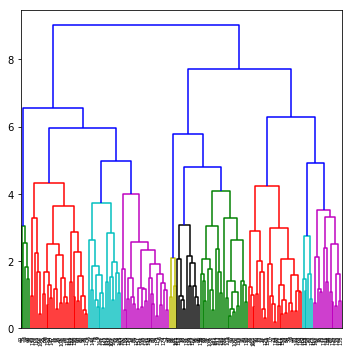

In [52]:
# with complete linkage
fig = plt.figure(figsize=(5,5))
mergings = linkage(country_with_col_and_pca, method = "complete", metric = "euclidean")
dendrogram(mergings, color_threshold = 4.5)
plt.tight_layout()
plt.show()

#### Creating 10 clusters

In [53]:
# Segmenting the dataset into 10 clusters concatenating the cluster column to the dataframe
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 10).reshape(-1,))
country_hc = pd.concat([country_with_pca, clusterCut], axis=1)
country_hc.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','PC1','PC2','PC3','PC4','PC5','ClusterID']
country_hc.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,-3.25,0.29,-1.04,0.78,0.01,0
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0.45,0.12,-0.32,-1.41,0.16,1
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,-0.43,0.64,1.68,-0.63,0.60,2
3,Angola,119.00,62.30,2.85,42.90,5900,20.87,60.10,6.16,3530,-3.33,-1.02,2.13,1.75,0.06,3
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1.30,-0.67,-0.14,-0.67,-0.41,4


In [54]:
country_hc.ClusterID.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [55]:
# Inspecting the no of countries per cluster
pd.DataFrame(country_hc.groupby('ClusterID')['Country'].count())

,Country
ClusterID,
0,30
1,25
2,17
3,5
4,25
5,28
6,15
7,12
8,6


***We can see from the 10 clusters created above that frequency distribution in the cluster is highly unequeal. The frequency is as high as 30 in one cluster and as low as 4 in another with lot of variation in the middle. Let us try to see if we can further create clusters that will have more or less a comparative no of countries in each clusters. 
And also we can try create a lower no of clusters so that visually its easier to determine the countries that are in genuinine need of aid.***

#### Creating 6 clusters

***Re-Drawing the Dendrogram with complete linkage to visually decide upon the no of clusters required.***

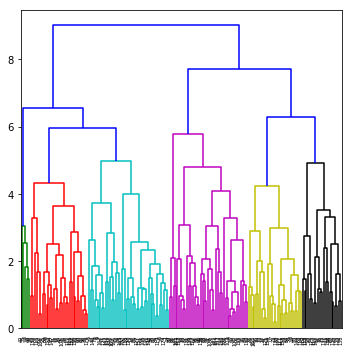

In [56]:
# with complete linkage
fig = plt.figure(figsize=(5,5))
mergings = linkage(country_with_col_and_pca, method = "complete", metric = "euclidean")
dendrogram(mergings, color_threshold = 5.8)
plt.tight_layout()
plt.show()

In [57]:
# Segmenting the dataset into 6 clusters and concatenating the cluster column to the dataframe
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
country_hc = pd.concat([country_with_pca, clusterCut], axis=1)
country_hc.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','PC1','PC2','PC3','PC4','PC5','ClusterID']
country_hc.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,-3.25,0.29,-1.04,0.78,0.01,0
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0.45,0.12,-0.32,-1.41,0.16,1
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,-0.43,0.64,1.68,-0.63,0.60,1
3,Angola,119.00,62.30,2.85,42.90,5900,20.87,60.10,6.16,3530,-3.33,-1.02,2.13,1.75,0.06,2
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1.30,-0.67,-0.14,-0.67,-0.41,3


In [58]:
country_hc.ClusterID.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [59]:
# Inspecting the no of countries per cluster
pd.DataFrame(country_hc.groupby('ClusterID')['Country'].count())

,Country
ClusterID,
0,30
1,42
2,5
3,41
4,28
5,21


***Calculating the mean PC values for each of the 6 clusters created.***

In [60]:
#summarise
hc_clusters_PC1 = pd.DataFrame(country_hc.groupby(["ClusterID"])['PC1'].mean())
hc_clusters_PC2 = pd.DataFrame(country_hc.groupby(["ClusterID"])['PC2'].mean())
hc_clusters_PC3 = pd.DataFrame(country_hc.groupby(["ClusterID"])['PC3'].mean())
hc_clusters_PC4 = pd.DataFrame(country_hc.groupby(["ClusterID"])['PC4'].mean())
hc_clusters_PC5 = pd.DataFrame(country_hc.groupby(["ClusterID"])['PC5'].mean())

***Creating a dataframe with the mean PC values for each of the 6 clusters created.***

In [61]:
df = pd.concat([pd.Series([0,1,2,3,4,5]), hc_clusters_PC1, hc_clusters_PC2,hc_clusters_PC3,hc_clusters_PC4,hc_clusters_PC5], axis=1)
df.columns = ["ClusterID", "PC1_Mean","PC2_Mean","PC3_Mean","PC4_Mean","PC5_Mean"]
df

,ClusterID,PC1_Mean,PC2_Mean,PC3_Mean,PC4_Mean,PC5_Mean
0,0,-2.91,0.08,-0.57,0.65,-0.47
1,1,-0.78,0.69,0.54,-0.75,0.17
2,2,-2.14,-1.10,2.07,1.50,0.28
3,3,0.26,-1.18,-0.38,-0.51,0.34
4,4,2.26,1.38,-0.63,0.32,-0.14
5,5,2.71,-0.77,0.82,0.78,-0.20


### Capturing the mean PC values for the clusters created in Hierarchical process, to be used later on in K-Means clustering as cluster centroids

In [62]:
df1 = df[['PC1_Mean', 'PC2_Mean', 'PC3_Mean', 'PC4_Mean', 'PC5_Mean']]
HC_Cluster_centers=np.array(df1, np.float64)
HC_Cluster_centers

array([[-2.91302469,  0.07828204, -0.5735364 ,  0.65283095, -0.47267143],
       [-0.78280293,  0.6895886 ,  0.54322414, -0.74763668,  0.16638366],
       [-2.13566466, -1.09765575,  2.07386352,  1.50128823,  0.2799288 ],
       [ 0.26106182, -1.17797781, -0.38111384, -0.5135137 ,  0.34122414],
       [ 2.2589246 ,  1.37783374, -0.62555774,  0.32119001, -0.13956265],
       [ 2.71396971, -0.76691228,  0.8172688 ,  0.77952918, -0.20428812]])

## Step 9: Performing K-Means Clustering:

### K-Means with some K

In [63]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(country_with_col_and_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [64]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_with_col_and_pca)
    sse_.append([k, silhouette_score(country_with_col_and_pca, kmeans.labels_)])

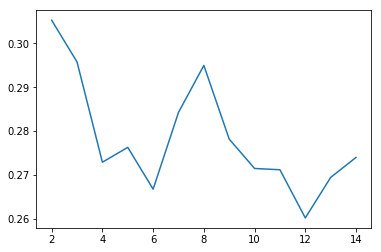

In [65]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

***From the Silhouette Graph, we see that the optimal no of clusters is 8. Let us next build a K-Means model with 8 clusters.***

## Sum of Squared Distances

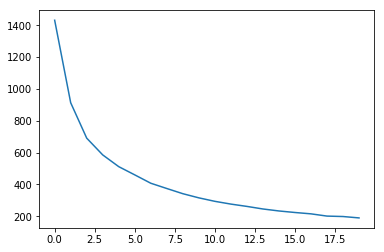

In [66]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_with_col_and_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

***From the Sum of Squared Distances, we see that the elbow in the curve occurs between 6 and 8 which gives an estimate of the optimal number K in K Means.***

### K-Means with K = 8 (most optimum value)

In [67]:
# Kmeans with K=8
model_clus8 = KMeans(n_clusters = 8, max_iter=50)
model_clus8.fit(country_with_col_and_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
# analysis of clusters formed
# Concatenation the clusters column with the mani dataframe
country_with_pca.index = pd.RangeIndex(len(country_with_pca.index))
country_km = pd.concat([country_with_pca, pd.Series(model_clus8.labels_)], axis=1)
country_km.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','PC1','PC2','PC3','PC4','PC5','ClusterID']
country_km.head(10)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,-3.25,0.29,-1.04,0.78,0.01,4
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0.45,0.12,-0.32,-1.41,0.16,1
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,-0.43,0.64,1.68,-0.63,0.60,5
3,Angola,119.00,62.30,2.85,42.90,5900,20.87,60.10,6.16,3530,-3.33,-1.02,2.13,1.75,0.06,2
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1.30,-0.67,-0.14,-0.67,-0.41,1
5,Argentina,14.50,18.90,8.10,16.00,18700,20.87,75.80,2.37,10300,-0.03,2.27,1.06,-0.09,1.77,5
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220,-0.21,0.33,0.37,-1.68,0.07,5
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,31090,2.69,2.31,-0.45,0.55,-0.71,3
8,Austria,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,31090,3.46,0.43,-0.82,1.13,0.03,3
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840,-0.22,0.57,1.39,-0.12,0.49,5


In [69]:
country_km.ClusterID.unique()

array([4, 1, 5, 2, 3, 7, 6, 0], dtype=int64)

In [70]:
#Inspecting the no of countries per cluster
country_km.groupby('ClusterID')['Country'].count()

ClusterID
0     5
1    46
2    15
3    21
4    27
5    31
6    14
7     8
Name: Country, dtype: int64

*We can see from the 8 clusters created above that frequency distribution is as high as 28 in one cluster and as low as 8 in another with lot of variation in the middle. Let us try to see if we can further create clusters that will have more or less a comparative no of countries in each clusters. 
And also we can try create a lower no of clusters so that visually its easier to determine the countries that are in genuinine need of aid.*

### K-Means with K = 6 (re-using cluster centers from Hierarchical clustering)

*Choosing the initial value of K centroids can affect the K-Means algorithm and its final results. The problem with K-Means is to initialise the cluster centers to achieve the global minima smartly.*

*In this step, we manually input the cluster centers as received from hierarchical clustering process into the K-Means process so that the K-Means algorithm considers these centers as the initial centroid locations.*

***Instead of using random centroids, using properly tested centroid locations will improve the efficiency of the clustering process.***

In [71]:
# Performing K-means clustering with manual cluster centers
model_clus = KMeans(n_clusters=6,init=HC_Cluster_centers,n_init=1,random_state=100)
model_clus.fit(country_with_col_and_pca)

KMeans(algorithm='auto', copy_x=True,
    init=array([[-2.91302,  0.07828, -0.57354,  0.65283, -0.47267],
       [-0.7828 ,  0.68959,  0.54322, -0.74764,  0.16638],
       [-2.13566, -1.09766,  2.07386,  1.50129,  0.27993],
       [ 0.26106, -1.17798, -0.38111, -0.51351,  0.34122],
       [ 2.25892,  1.37783, -0.62556,  0.32119, -0.13956],
       [ 2.71397, -0.76691,  0.81727,  0.77953, -0.20429]]),
    max_iter=300, n_clusters=6, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=100, tol=0.0001, verbose=0)

In [72]:
centers = model_clus.cluster_centers_
print(centers)

[[-2.79101463  0.10186147 -0.57508726  0.57232554 -0.27315523]
 [-0.52958252  0.96488758  0.7036523  -0.74748657  0.35081624]
 [-2.13566466 -1.09765575  2.07386352  1.50128823  0.2799288 ]
 [ 0.35299393 -0.78534214 -0.33637453 -0.73001229  0.16217014]
 [ 2.83772828  1.41147323 -0.75065268  0.76085766 -0.20047276]
 [ 2.52304756 -0.9979828   0.86246874  0.59760052 -0.26125001]]


In [73]:
# analysis of clusters formed
# Concatenation the clusters column with the mani dataframe
country_with_pca.index = pd.RangeIndex(len(country_with_pca.index))
country_km = pd.concat([country_with_pca, pd.Series(model_clus.labels_)], axis=1)
country_km.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','PC1','PC2','PC3','PC4','PC5','ClusterID']
country_km.head(10)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,-3.25,0.29,-1.04,0.78,0.01,0
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0.45,0.12,-0.32,-1.41,0.16,3
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,-0.43,0.64,1.68,-0.63,0.60,1
3,Angola,119.00,62.30,2.85,42.90,5900,20.87,60.10,6.16,3530,-3.33,-1.02,2.13,1.75,0.06,2
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1.30,-0.67,-0.14,-0.67,-0.41,3
5,Argentina,14.50,18.90,8.10,16.00,18700,20.87,75.80,2.37,10300,-0.03,2.27,1.06,-0.09,1.77,1
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220,-0.21,0.33,0.37,-1.68,0.07,1
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,31090,2.69,2.31,-0.45,0.55,-0.71,4
8,Austria,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,31090,3.46,0.43,-0.82,1.13,0.03,4
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840,-0.22,0.57,1.39,-0.12,0.49,1


### Visualizing the countries based on GDPP & Inflation for the Different Countries

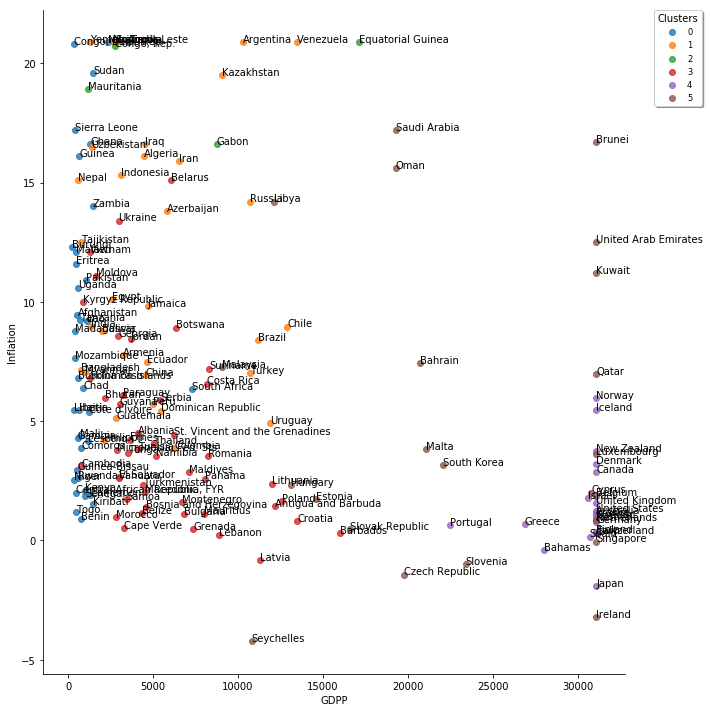

In [74]:
sns.lmplot( x="gdpp", y="inflation", data=country_km, fit_reg=False, hue='ClusterID', legend=False, size=10)
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.legend(frameon=True, fontsize='small', shadow='True', title='Clusters', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i, txt in enumerate(country_km.Country):
    plt.annotate(txt, (country_km.gdpp[i],country_km.inflation[i]))
plt.tight_layout()
plt.show()

### Visualizing the countries based on PC1 & PC2 for the Different Countries

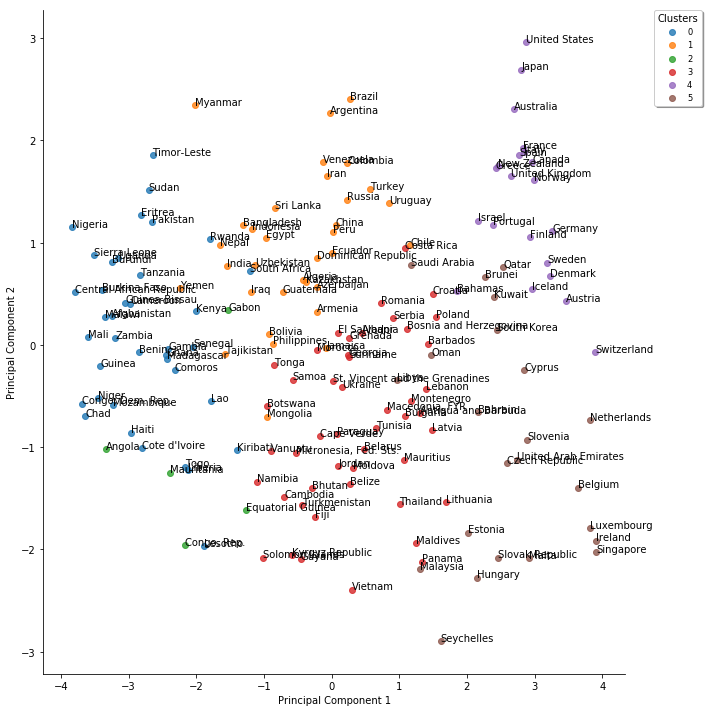

In [75]:
sns.lmplot( x="PC1", y="PC2", data=country_km, fit_reg=False, hue='ClusterID', legend=False, size=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(frameon=True, fontsize='small', shadow='True', title='Clusters', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i, txt in enumerate(country_km.Country):
    plt.annotate(txt, (country_km.PC1[i],country_km.PC2[i]))
plt.tight_layout()
plt.show()

### Visualizing the countries based on GDPP, Child Mortality & Exports for the Different Countries

<IPython.core.display.Javascript object>


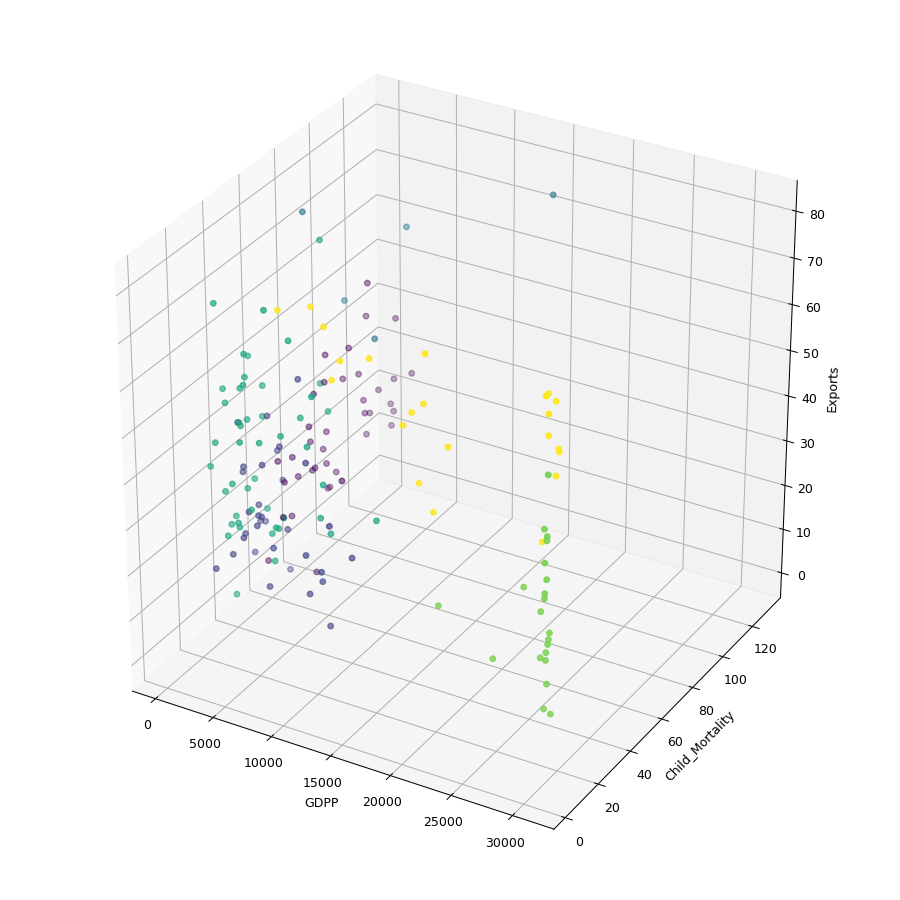

In [80]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(country_km['gdpp'], country_km['child_mort'], country_km['exports'],zdir='z', s=20, marker = 'o', c=country_km['ClusterID'])
ax.set_xlabel('GDPP')
ax.set_ylabel('Child_Mortality')
ax.set_zlabel('Exports')
ax.grid(True)
plt.tight_layout()
plt.show()

In [81]:
country_km.ClusterID.unique()

array([0, 3, 1, 2, 4, 5], dtype=int64)

In [82]:
#Inspecting the no of countries per cluster
pd.DataFrame(country_km.groupby('ClusterID')['Country'].count())

,Country
ClusterID,
0,38
1,33
2,5
3,47
4,21
5,23


In [83]:
country_km.columns

Index(['Country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'ClusterID'],
      dtype='object')

***Calculating the mean of PC values and the original variables for each of the 6 clusters created.***

In [84]:
#summarise
km_clusters_PC1 = pd.DataFrame(country_km.groupby(["ClusterID"])['PC1'].mean())
km_clusters_PC2 = pd.DataFrame(country_km.groupby(["ClusterID"])['PC2'].mean())
km_clusters_PC3 = pd.DataFrame(country_km.groupby(["ClusterID"])['PC3'].mean())
km_clusters_PC4 = pd.DataFrame(country_km.groupby(["ClusterID"])['PC4'].mean())
km_clusters_PC5 = pd.DataFrame(country_km.groupby(["ClusterID"])['PC5'].mean())

km_clusters_child_mortality = pd.DataFrame(country_km.groupby(["ClusterID"])['child_mort'].mean())
km_clusters_health = pd.DataFrame(country_km.groupby(["ClusterID"])['health'].mean())
km_clusters_inflation = pd.DataFrame(country_km.groupby(["ClusterID"])['inflation'].mean())
km_clusters_imports = pd.DataFrame(country_km.groupby(["ClusterID"])['imports'].mean())
km_clusters_exports = pd.DataFrame(country_km.groupby(["ClusterID"])['exports'].mean())
km_clusters_gdpp = pd.DataFrame(country_km.groupby(["ClusterID"])['gdpp'].mean())

***Creating a dataframe with the mean of PC values and original variables for each of the 6 clusters created.***

In [85]:
df_new = pd.concat([pd.Series([0,1,2,3,4,5]), km_clusters_child_mortality,km_clusters_health,km_clusters_inflation,km_clusters_imports,km_clusters_exports,km_clusters_gdpp,km_clusters_PC1, km_clusters_PC2,km_clusters_PC3,km_clusters_PC4,km_clusters_PC5], axis=1)
df_new.columns = ["ClusterID", "child_mortality_Mean","health_Mean","inflation_Mean","import_Mean","export_Mean","gdpp_Mean","PC1_Mean","PC2_Mean","PC3_Mean","PC4_Mean","PC5_Mean"]
df_new

,ClusterID,child_mortality_Mean,health_Mean,inflation_Mean,import_Mean,export_Mean,gdpp_Mean,PC1_Mean,PC2_Mean,PC3_Mean,PC4_Mean,PC5_Mean
0,0,93.66,6.68,8.42,40.55,22.83,1044.26,-2.79,0.10,-0.58,0.57,-0.27
1,1,29.47,5.53,11.74,28.96,26.78,5171.70,-0.53,0.96,0.70,-0.75,0.35
2,2,91.00,3.54,19.59,47.32,66.37,6664.00,-2.14,-1.10,2.07,1.50,0.28
3,3,20.86,6.94,4.29,58.04,44.77,5644.17,0.35,-0.79,-0.34,-0.73,0.16
4,4,4.73,10.17,1.47,33.27,34.30,30292.38,2.84,1.41,-0.75,0.76,-0.20
5,5,7.44,6.05,5.18,60.02,70.36,23155.65,2.52,-1.00,0.86,0.60,-0.26


## Step 10: Visualizing clusters as per PCs and socio-economic factors:

In [86]:
df_new.columns

Index(['ClusterID', 'child_mortality_Mean', 'health_Mean', 'inflation_Mean',
       'import_Mean', 'export_Mean', 'gdpp_Mean', 'PC1_Mean', 'PC2_Mean',
       'PC3_Mean', 'PC4_Mean', 'PC5_Mean'],
      dtype='object')

In [87]:
numeric_var = ['child_mortality_Mean','health_Mean',  'inflation_Mean','import_Mean',
       'export_Mean', 'gdpp_Mean', 'PC1_Mean', 'PC2_Mean', 'PC3_Mean',
       'PC4_Mean','PC5_Mean']
print(numeric_var)

['child_mortality_Mean', 'health_Mean', 'inflation_Mean', 'import_Mean', 'export_Mean', 'gdpp_Mean', 'PC1_Mean', 'PC2_Mean', 'PC3_Mean', 'PC4_Mean', 'PC5_Mean']


***Plotting the mean values for PCs and other socio-economic factors per cluster.***

<IPython.core.display.Javascript object>


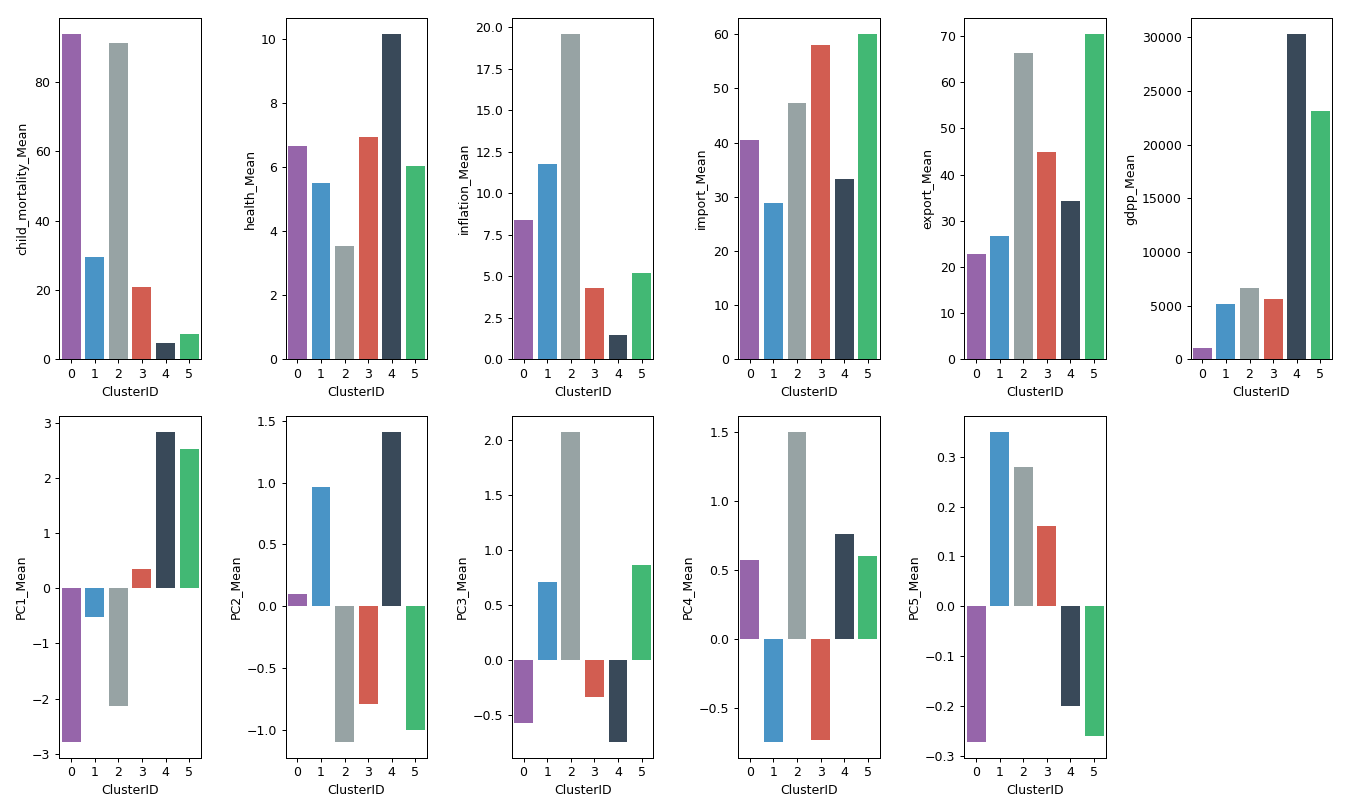

In [88]:
#Function to plot the values  for PCs and original variables per cluster
def barplot(var_list):
    plt.figure(figsize=(15,9))
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    for var in var_list:
        plt.subplot(2,6,var_list.index(var)+1)
       #sns.boxplot(y=var,palette='BrBG', data=country)
        sns.barplot(x='ClusterID', y=var, palette=flatui,data=df_new)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
barplot(numeric_var)    

## Step 11: Conclusion

## ***The following observations were made from the above cluster visualization:***

 - <font color = blue>Countries belonging to Clusters ‘0’ and ‘2’ have `high child mortality rates` for children under 5 years of age.</font>
 - <font color = blue>Cluster ‘0’ has `very low gdpp value` followed by clusters ‘1’, ’2’ and ‘3’.</font>
 - <font color = blue>Total `spending on health is poorest` for countries belonging to cluster ‘2’. </font>
 - <font color = blue>Cluster 4 has countries with the `strongest socio-economic  and health status` like USA, the European giants -UK, Germany, France and some Asian leaders like Japan, Israel etc. </font>
 
|ClusterID|child_mortality_Mean|health_Mean|inflation_Mean|import_Mean|export_Mean|gdpp_Mean|PC1_Mean|PC2_Mean|PC3_Mean|PC4_Mean|PC5_Mean|
|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
|	0|	<font color = red>93.66</font>|	6.68|	<font color = red>8.42</font>|	40.55|	22.83|	<font color = red>1044.26</font>|	-2.79|	0.10|	-0.58|	0.57|	-0.27|
|	1|	29.47|	5.53|	11.74|	28.96|	26.78|	5171.70|	-0.53|	0.96|	0.70|	-0.75|	0.35|
|	2|	<font color = red>91.00</font>|	<font color = red>3.54</font>|	19.59|	47.32|	66.37|	<font color = red>6664.00</font>|	-2.14|	-1.10|	2.07|	1.50|	0.28|
|	3|	20.86|	6.94|	4.29|	58.04|	44.77|	5644.17|	0.35|	-0.79|	-0.34|	-0.73|	0.16|
|	4|	4.73|	10.17|	1.47|	33.27|	34.30|	30292.38|	2.84|	1.41|	-0.75|	0.76|	-0.20|
|	5|	7.44|	6.05|	5.18|	60.02|	70.36|	23155.65|	2.52|	-1.00|	0.86|	0.60|	-0.26|
 
 
## ***Identifying countries in need of Financial Aid from the cluster distribution:*** 

### <font color = red> ***Cluster# 0 -- ***
 - <font color = blue>Highest child mortality rate.</font>
 - <font color = blue>Lowest GDPP value.</font>
 - <font color = blue>38 Countries in this cluster are mostly African countries like- `Cameroon, Haiti, Kenya, Madagascar, Nigeria, Rwanda, Senegal, Sudan, South Africa` etc and some occasional Asian countries like- `Pakistan and Afghanistan`.</font>

### <font color = red> ***Cluster# 2 -- ***
 - <font color = blue>Lowest total spending on Health.</font>
 - <font color = blue>2nd Highest child mortality rate.</font>
 - <font color = blue>3rd Lowest GDPP value.</font> 
 - <font color = blue>Countries belonging to this cluster are all 5 African countries. The 5 countries that belong to this cluster are- `Angola, Congo Rep.,Equatorial Guinea, Gabon, Mauritania`.</font>  
    
 